Target
1.Determine the recognition accuracy (percentage of correctly classified data points) of KNN classifier on K=1,3,5
2.Determine the overall run time for computing the 1-nearest neighbor of every data in data2-test.dat.

In [307]:
import numpy as np
import numpy.linalg as la
import csv
import scipy.spatial.distance as ssd
import timeit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import pattrex.plotting_mpl as plt_rex
import pattrex.preprocessing as pre_rex
import pattrex.fitting as fit_rex
import pattrex.unit_circles as uc_rex


In [308]:
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

data = np.loadtxt('data/data2-train.dat', dtype=dt, comments='#', delimiter=None)

x = np.array([d[0] for d in data])#x
y = np.array([d[1] for d in data])#y
lable = np.array([d[2] for d in data])#label

X = np.vstack((x, y, lable))  # data is going to be column-wise
X.shape

# split
X_pos, X_neg = pre_rex.split_data(X, True, 2, [1.0, -1.0])
print("Positive :", X_pos.shape[1], "; Negative :", X_neg.shape[1])


Positive : 128 ; Negative : 128


<IPython.core.display.Javascript object>


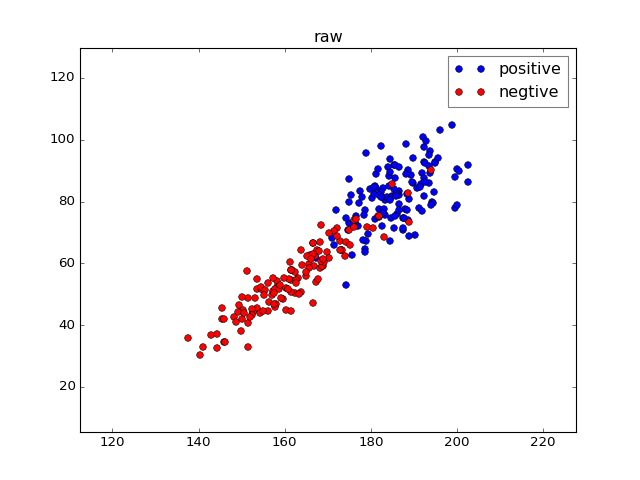

In [309]:
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_ = np.vstack((x, y))  # only the measurements; data is col-wise
xmin, ymin = X_.min(axis=1)
xmax, ymax = X_.max(axis=1)

xlim = [xmin-25, xmax+25]  # purely for looks
ylim = [ymin-25, ymax+25]

plt_rex.plot2d(X_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
plt_rex.plot2d(X_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
               plotlabel="negtive", title="raw")

In [349]:
#1.Compute Nearest neighbor
#1.1 Naïve way: O(n^2) ( n*(n-1) ) for all
#https://www.researchgate.net/publication/283568278_NumPy_SciPy_Recipes_for_Data_Science_Computing_Nearest_Neighbors?channel=doi&linkId=563f695508ae45b5d28d2ea9&showFulltext=true
def nearest_neighbor_method1(X, q):
    m, n = X.shape
    minindx = 0
    mindist = np.inf
    for i in range(n):
        dist = la.norm(X[:,i] - q)
        if dist <= mindist:
            mindist = dist
            minindx = i
    return minindx

In [350]:
#1.2
def nearest_neighbor_method2(X, q):
    m, n = X.shape
    return np.argmin(np.sum((X-q.reshape(m,1))**2, axis=0))

In [351]:
#1.3
def nearest_neighbor_method3(X, q):
    X = X.T
    return np.argmin(np.sum((X - q)**2, axis=1))

In [352]:
#Method provided by the paper mentioned above
def k_nearest_neighbors(X, q, k):
    X = X.T
    sorted_inds = np.argsort(np.sum((X - q)**2, axis=1))
    return sorted_inds[:k]

In [353]:
#Or we could simply apply nearest_neighbor_mothodi k times, if k is relatively small comparing to size of X
def k_nearest_neighbors_smallk(X, q, k):
    inds=nearest_neighbor_method2(X, q)
    a_inds = np.array(inds)
    X=np.delete(X, inds, axis=1)
    for i in range(k-1):
        inds=nearest_neighbor_method2(X, q)
        a_inds=np.append(a_inds,inds)#remember to assign a pointer to new array. the return value is a pointer
        if i!=k-1:
            X=np.delete(X, inds, axis=1)
    return a_inds

In [354]:
#Test
if False:
    q = np.array([170, 66])
#     X = np.random.rand(2, 250)
    # print(X[:])
    # print(X_)
    # inds = k_nearest_neighbors_smallk(X_, q, 3)
    sorted_inds=nearest_neighbor_method2(X_, q)
    a_inds = np.array(sorted_inds)
#     print(X_[:,sorted_inds])
#     print(sorted_inds)
    X_=np.delete(X_, sorted_inds, axis=1)
    sorted_inds=nearest_neighbor_method2(X_, q)
    a_inds=np.append(a_inds,sorted_inds)
#     print(X_[:,sorted_inds])
#     print(sorted_inds)
    X_=np.delete(X_, sorted_inds, axis=1)
    sorted_inds=nearest_neighbor_method2(X_, q)
    a_inds=np.append(a_inds,sorted_inds)
#     print(X_[:,sorted_inds])
#     print(sorted_inds)
    print("3 indivisual X")
    print(a_inds)
    
    print("3 indivisul X once")
    s_inds = k_nearest_neighbors_smallk(X_,q,3)
    print(s_inds)
    
    print("sorted method")
    o_inds = k_nearest_neighbors(X_,q,3)
    print(o_inds)

In [355]:
# print(X[0:2,:])
print(X.shape[1])
for i in range(X.shape[1]):
    print("=====")
    print(i)
    print(X[0:2,i])
    X_=np.delete(X, i, axis=1)##Delete itself
    inds = k_nearest_neighbors_smallk(X_[0:2,:],X[0:2,i],5)
    #Alternative inds = k_nearest_neighbors(X_[0:2,:],X[0:2,i],5)
    print(inds)
    print(X[0:2,inds])

256
=====
0
[ 192.46335959   92.66939681]
[ 42  91  38  18 104]
[[ 184.70514548  178.29822704  177.20162659  182.60755342  180.99566577]
 [  81.49667726   67.56097074   79.42037955   81.52251193   84.96826551]]
=====
1
[ 183.21092154   75.77560296]
[ 70 190 136  67  57]
[[ 191.0803533   148.1130632   165.71469584  176.98148179  183.71431948]
 [  78.03261446   42.59380945   59.80011286   71.96531743   81.40774491]]
=====
2
[ 189.88502339   86.05353128]
[47 23 24 30 16]
[[ 179.29957975  184.07819777  190.62023129  193.81094929  188.09209416]
 [  69.42262758   91.28518656   84.44746403   89.15714746   98.74513517]]
=====
3
[ 181.90210718   77.48049394]
[ 59  69 189   1 134]
[[ 193.42993862  188.86746092  154.4244597   183.21092154  163.037288  ]
 [  85.87862592   68.75349823   51.74342888   75.77560296   55.25119835]]
=====
4
[ 199.64405026   87.85102141]
[24 20 86 26 26]
[[ 190.62023129  185.7308106   184.45388262  191.70329321  191.70329321]
 [  84.44746403   87.58105436   67.13939628  

In [356]:
#data2-test
dt = np.dtype([('x', np.float), ('y', np.float), ('lable', np.float)])  # g is byte-string

data = np.loadtxt('data/data2-test.dat', dtype=dt, comments='#', delimiter=None)

x_t = np.array([d[0] for d in data])#x
y_t = np.array([d[1] for d in data])#y
lable_t = np.array([d[2] for d in data])#label

X_t = np.vstack((x_t, y_t, lable_t))  # data is going to be column-wise
X_t.shape

# split
X_t_pos, X_t_neg = pre_rex.split_data(X_t, True, 2, [1.0, -1.0])
print("Positive :", X_t_pos.shape[1], "; Negative :", X_t_neg.shape[1])


Positive : 48 ; Negative : 48


<IPython.core.display.Javascript object>


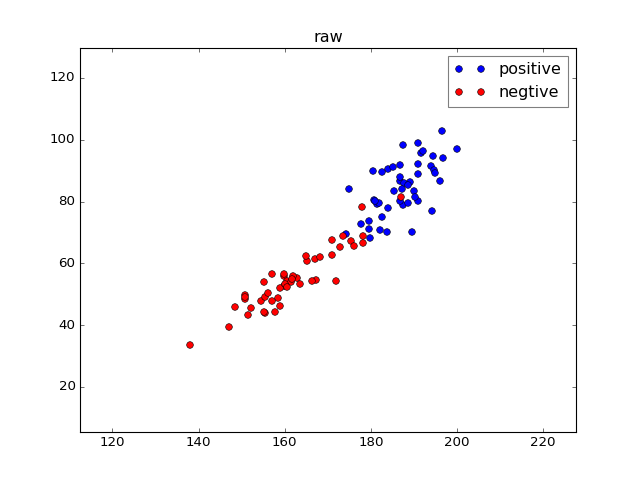

In [357]:
# plotting
fig = plt.figure()
axs = fig.add_subplot(111)

# limits for the axes
X_t_ = np.vstack((x, y))  # only the measurements; data is col-wise
xmin, ymin = X_t_.min(axis=1)
xmax, ymax = X_t_.max(axis=1)

xlim = [xmin-25, xmax+25]  # purely for looks
ylim = [ymin-25, ymax+25]

plt_rex.plot2d(X_t_pos, colwise_data=True, hatch='bo', x_lim=xlim, y_lim=ylim, 
              show=False, axs=axs, set_aspect_equal=False, plotlabel="positive")
plt_rex.plot2d(X_t_neg, colwise_data=True, hatch='ro', x_lim=xlim, 
               y_lim=ylim, show=False, axs=axs, set_aspect_equal=False, 
               plotlabel="negtive", title="raw")

In [358]:
print(X.shape[1])
hit=0
for i in range(X_t.shape[1]):
#     print("=====")
#     print(i)
#     print(X_t[0:2,i])
    inds = k_nearest_neighbors_smallk(X[0:2,:],X_t[0:2,i],3)
    #Alternative inds = k_nearest_neighbors(X_[0:2,:],X[0:2,i],5)
#     print(inds)
#     print(X[2,inds])
#     print(np.sum(X[2,inds]))
#     print(X_t[2,i])
    #check if prediction (np.sum(X[2,inds])) matches the true lable (X_t[2,i])
#     print( np.multiply(np.sum(X[2,inds]),X_t[2,i]) )
    if np.multiply(np.sum(X[2,inds]),X_t[2,i])>0:
        hit+=1

print(hit)
print(X_t.shape[1])
print(hit/X_t.shape[1])

256
86
96
0.8958333333333334


In [359]:
def recoAccurKNN(train, test, k):
    hit=0
    for i in range(test.shape[1]):
    #     print("=====")
    #     print(i)
    #     print(Test[0:2,i])
        inds = k_nearest_neighbors_smallk(train[0:2,:],test[0:2,i],k)
        #Alternative inds = k_nearest_neighbors(X_[0:2,:],X[0:2,i],5)
    #     print(inds)
    #     print(train[2,inds])
    #     print(np.sum(train[2,inds]))
    #     print(test[2,i])
        #check if prediction (np.sum(train[2,inds])) matches the true lable (test[2,i])
    #     print( np.multiply(np.sum(train[2,inds]),test[2,i]) )
        if np.multiply(np.sum(train[2,inds]),test[2,i])>0:
            hit+=1
    return (hit/test.shape[1])

In [360]:
print (recoAccurKNN(X,X_t,1))
print (recoAccurKNN(X,X_t,3))
print (recoAccurKNN(X,X_t,5))

0.8854166666666666
0.8958333333333334
0.9375


In [361]:
def test1NNtime(data, method):
    start = timeit.default_timer()
    for i in range(data.shape[1]):
#         print("=====")
#         print(i)
#         print(data[0:2,i])
        data_=np.delete(data, i, axis=1)##Delete itself
        if method==1:
            inds = nearest_neighbor_method1(data_[0:2,:],data[0:2,i])
        elif method==2:
            inds = nearest_neighbor_method2(data_[0:2,:],data[0:2,i])
        elif method==3:
            inds = nearest_neighbor_method3(data_[0:2,:],data[0:2,i])
#         print(inds)
#         print(data[0:2,inds])
    stop = timeit.default_timer()
    return (stop-start)


In [362]:
print(test1NNtime(X_t,1))

print(test1NNtime(X_t,2))

print(test1NNtime(X_t,3))


0.09074706601677462
0.0023652020026929677
0.0022159859945531934
